In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

DATA PREPROCESSING

In [2]:
df = pd.read_csv("pred.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
furniture = df.loc[df['Category'] == 'Furniture']

In [5]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [6]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [8]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [10]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


Indexing with time series data

In [11]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [12]:
y = furniture['Sales'].resample('MS').mean()

In [13]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

Visualizing furniture sales time series data

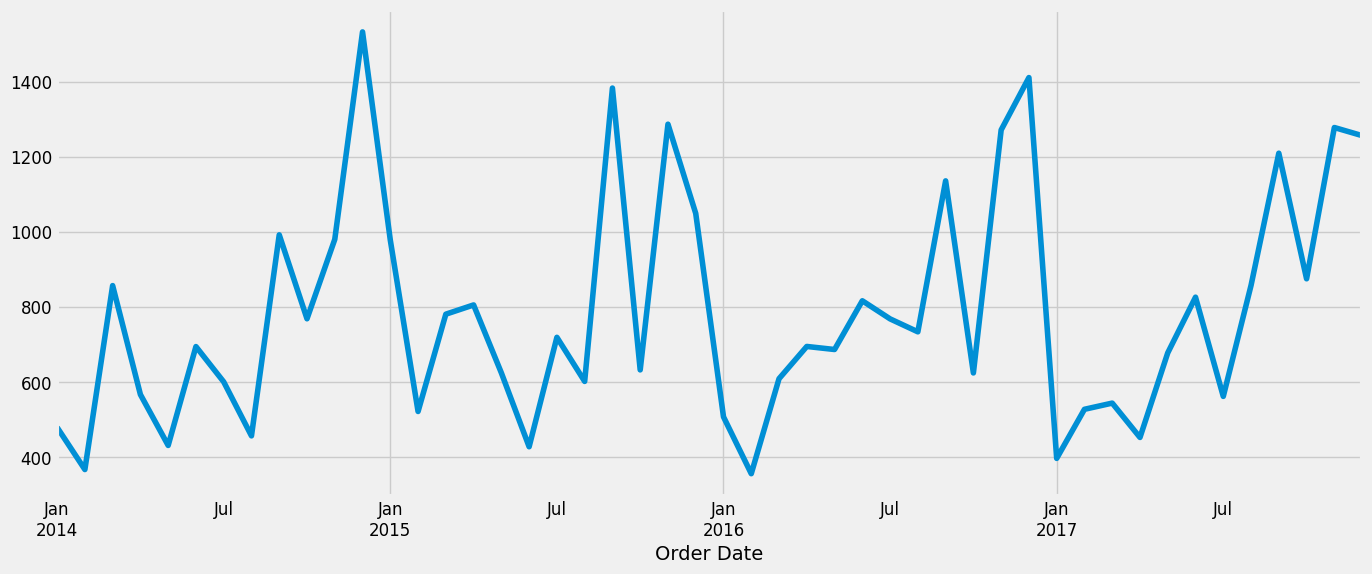

In [14]:
y.plot(figsize=(15, 6))
plt.show()

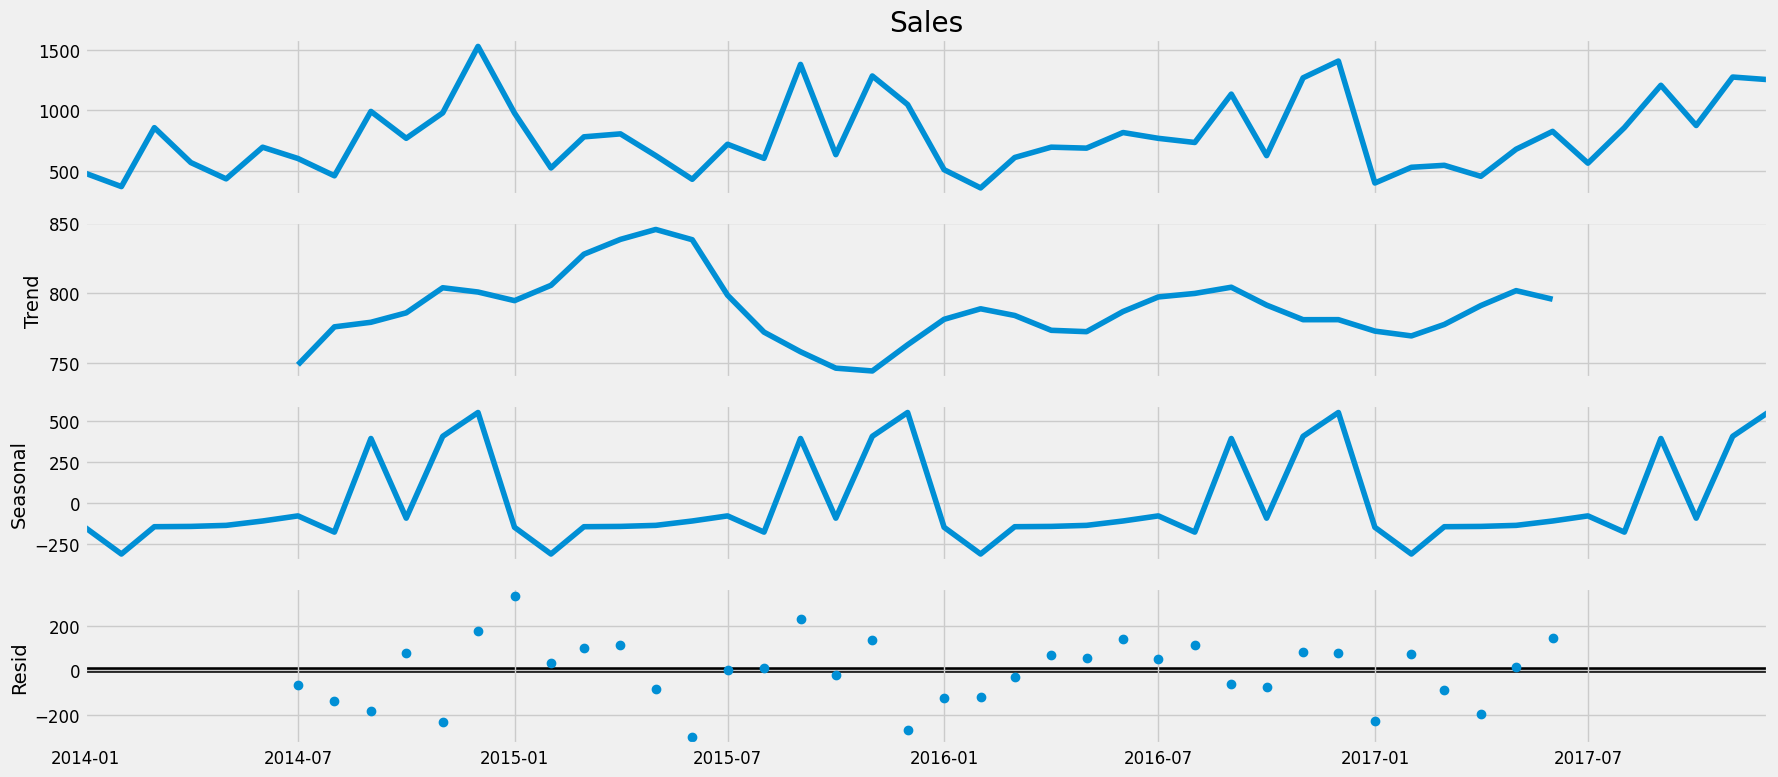

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Time series forescasting with linear regression
we are going to apply linear regression first before moving on to more advance models

Getting the data ready

In [16]:
F1= df.loc[df['Category'] == 'Furniture']

In [17]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
F1.drop(cols, axis=1, inplace=True)
F1= F1.sort_values('Order Date')

In [18]:

F1.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [20]:
len(F1)
f1=[]
f1=F1['Sales']
f1=list(f1)
f2=f1.copy()

In [21]:
print(len(f1),len(f2))

2121 2121


In [22]:
F=pd.DataFrame()
F['Sales']=f1
F['F-Sales']=f2

In [23]:
F.head()

,Sales,F-Sales
0,2573.820,2573.820
1,76.728,76.728
2,51.940,51.940
3,9.940,9.940
4,545.940,545.940


In [24]:
F['index']=F.index
F.tail()

,Sales,F-Sales,index
2116,258.750,258.750,2116
2117,1207.840,1207.840,2117
2118,101.120,101.120,2118
2119,300.980,300.980,2119
2120,323.136,323.136,2120


In [25]:
Y=F.drop(['Sales','index'],axis=1,inplace=False)
Y.head()

,F-Sales
0,2573.820
1,76.728
2,51.940
3,9.940
4,545.940


In [26]:
X=F.drop(['F-Sales'],axis=1 ,inplace=False)
X.head()

,Sales,index
0,2573.820,0
1,76.728,1
2,51.940,2
3,9.940,3
4,545.940,4


Model 1 linear regression

In [27]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model1=LinearRegression()
model1=sm.OLS(y_train,X_train).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                F-Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.940e+32
Date:                Tue, 24 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:30:00   Log-Likelihood:                          45477.
No. Observations:                1696   AIC:                                 -9.095e+04
Df Residuals:                    1694   BIC:                                 -9.094e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
y_pred=model1.predict(X_test)

In [32]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3.960563209221727e-25
3.8178088141862915e-13
1.0


Time series forecasting with ARIMA
We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1509.5150045321598
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919128
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997936173
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1292.607958841192
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280301454
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.925227075811


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2706.316820565381
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091573
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673301


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.56276633731267
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2456.852330703051
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255764421593
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1510.32805430179


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671793863
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.967122816796
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1388.9469825904657
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151487
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817423


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1336.5778288225686
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482503
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233318579
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442583


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2571.266532965775
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684172176
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612504
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1554.7436698674476
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609645
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352075


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1221.1704253262703
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084603
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143852
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185299


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2436.3507808238332
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958151146
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965887
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771587


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2480.7380704162542
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021393436
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188088199
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1514.356757253081
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619099
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587849636
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1786.128014674824
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345435
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.32649925085855
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835332


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2507.7415517554964
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876094887
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939413
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608864


C:\Users\sreet\Documents\anaconda installation\envs\aidl\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2182.5211173456923
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395467735
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610223321424


In [35]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

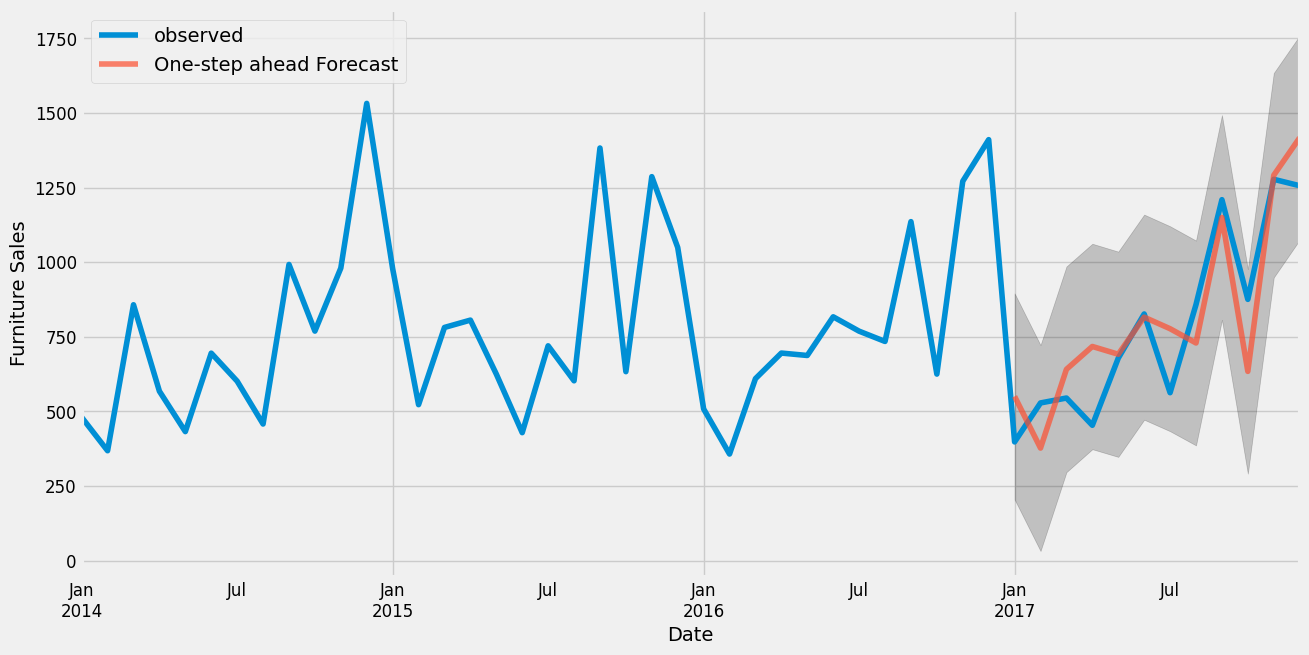

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

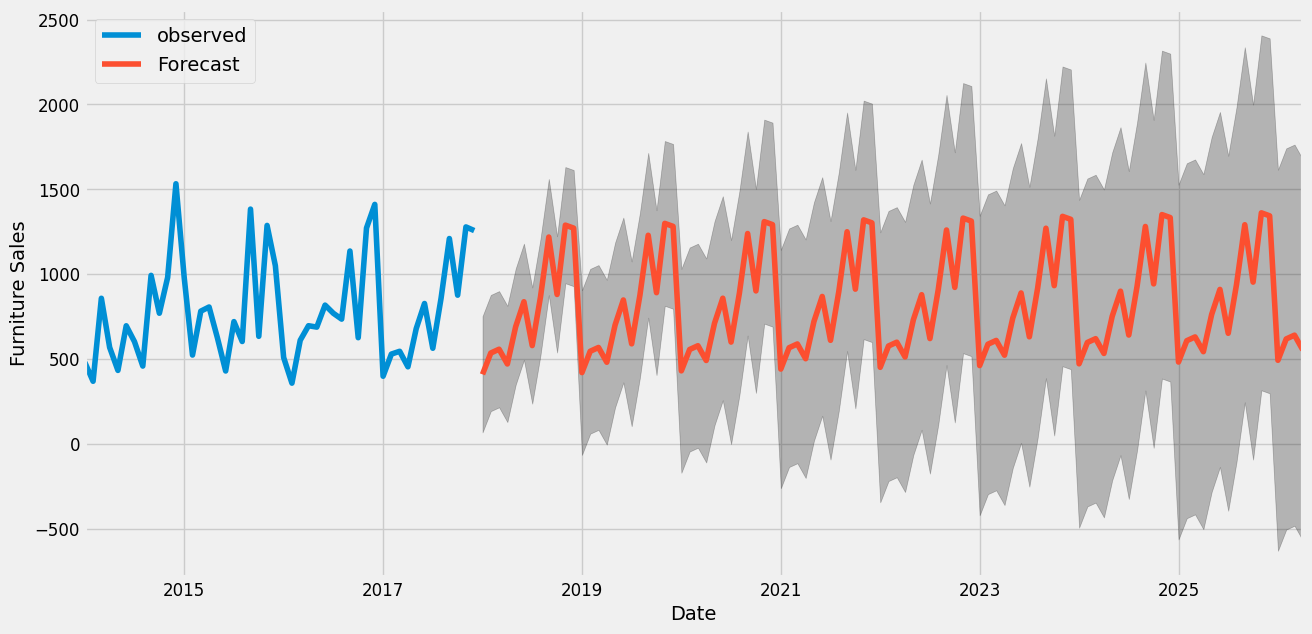

In [37]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()